# IFT2505 Séance de démonstration 2

## 1. Rappels

Soit le problème linéaire suivant: 
\begin{align*}
  \min\      & c^T x \\
  \text{sujet à } & Ax =b \\
                  &  x\geq 0
\end{align*}

$A$ une matrice de $m$ lignes et $n$ colonnes $(m \times n)$ et $b$ un vecteur colonne de $m$ lignes.
On suppose $m\leq n$ et $A$ est supposée de rang plein (i.e. les lignes de $A$ sont linéairement indépendantes, $rang(A) = m$).

**Définition 1**
Une sous-matrice $B$ de $A$ est dite $\textbf{base}$ si B est une sous-matrice carrée inversible (i.e. $B^{-1} existe$), de dimensions $m \times m$ (i.e. $B$ est constituée de $m$ colonnes de $A$).

**Définition 2**
Les *variables de base* $x_B$ sont les variables associées aux colonnes de $A$ constituant la base $B$.

**Définition 3**
Une solution de base associée à la base $B$, notée $w$ correspond à poser les variables hors bases à zéro (elles sont au nombre de $n-m$), et à déterminer le vecteur des variables de base $x_B = B^{-1}b$. Sans perte de généralité, supposons que $B$ est constitué des $m$ premières colonnes de $A$ et définissons $x_R$ le vecteur regroupant les variables hors base; on représente $w= \begin{pmatrix} x_B & x_R \end{pmatrix}^T$.

$\textbf{Définition 4}$
Une solution de base est dite réalisable si $x_B \geq 0$.

$\textbf{Définition 5}$
Une solution de base est dite non dégénérée si $x_B > 0$.

## 2. Luenberger, Exercice 5 page 29

Transformez le problème suivant sous forme standard, et trouvez la solution de base optimale: 
\begin{align*}
  \max\            & x_1+4x_2 +x_3 \\
  \text{sujet à } &   2x_1 -2x_2 +x_3 = 4 \\
                  &    x_1 - x_3 =1 \\
                  &    x_2, x_3 \geq 0
\end{align*}

$x_1$ est une variable libre.

Nous utilisons la contrainte $ x_1 - x_3 =1 $ pour simplifier le problème: $x_1 = 1 + x_3$.

Alors, $2x_1 -2x_2 +x_3 = 3$ devient $ -2x_2 + 3x_3 = 2$.

L'objectif devient : 
$$
4x_2 +2x_3 +1
$$

On s'intéresse seulement à la solution optimale et non à la valeur de l'objectif.
Ainsi, le problème sous forme standard est alors équivalent à:
\begin{align*}
  -\min             &   -4x_2 -2x_3 \\
  \text{sujet à }  &   -2x_2 + 3x_3 = 2 \\
                   &    x_2, x_3 \geq 0
\end{align*}

Le matrice des contraintes linéaires est
$$
A = \begin{pmatrix}
      -2 & 3
\end{pmatrix}
$$
$A$ ne compte que deux sous-matrices (qui sont des scalaires):
$A_2 = (-2)$ et $A_3 = (3)$.
$A_2$ et $A_3$ sont inversibles, donc $A_2$ et $A_3$ sont des bases.
Les solutions correspondant à chaque base sont:
* $A_2$: $x_2 = -1$ et $x_3 = 0$, où $x_2$ est variable de base.
* $A_3$: $x_3 = \frac{2}{3}$ et $x_2 = 0$, où $x_3$ est variable de base.
Seule $A_3$ est une base réalisable puisque la solution correspondante respecte la non négativité des variables.

In [1]:
using Plots

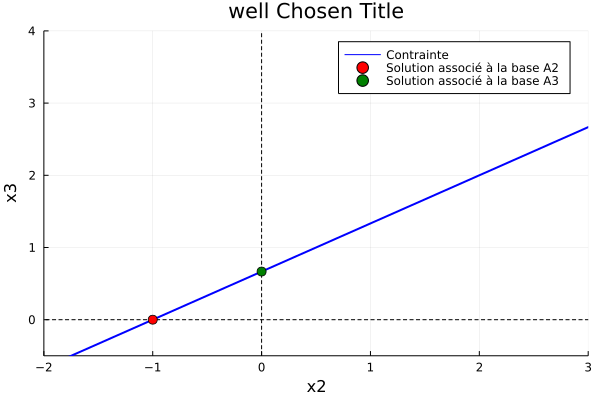

In [2]:
plot(x -> (2 + 2x)/3, color = :blue, linewidth = 2, label = "Contrainte")
hline!([0], color = :black, linestyle = :dash, label = "")
vline!([0], color = :black, linestyle = :dash, label = "")
plot!(xlims = (-2, 3), ylims = (-0.5, 4))
scatter!([-1], [0], markersize = 5, label = "Solution associé à la base A2", color = :red)
scatter!([0], [2/3], markersize = 5, label = "Solution associé à la base A3", color = :green)
plot!(title = "well Chosen Title")
plot!(xlabel = "x2", ylabel = "x3")

$\textbf{Remarque importante : }$
Le problème n'est pas borné inférieurement. Il n'y a donc pas de solution optimale. A3 n'est donc pas une base optimale. 

## 3. Exercice 3

Considérons le problème suivant
\begin{align*}
  \min_x\ & c^Tx \\
  \mbox{sujet à } & Ax = b \\
\end{align*}
qui s'écrit aussi:
\begin{align*}
  \text{Min }     & c^T x \\
  \text{Sujet à } & \sum_{j = 1}^{n} a_{ij}x_j = b_i,\ i= 1, ..., m \\
\end{align*}
En ramenant le problème à la forme standard, montrez qu'il n'existe pas de solution de base telle que pour un indice $j$ donné, $x_j^{+}$ et $x_j^{-}$ soient dans la base.

Les variables $x_j$ étant libres, on les remplace par:
$x_j = x_j^{+} - x_j^{-}$, avec $x_j^{+}, x_j^{-}\geq 0$.

On fait les substitions et on obtient le problème sous *forme standard*
\begin{align*}
\min_x\ & c^t x^+ - c^t x^-\\
\text{ Sujet à } & \sum_{j=1}^n a_{ij} x_j^+ - \sum_{j=1}^n a_{ij} x_j^- = b_i,\ i=1,\ldots, m\\
 & x^+, \ x^- \ge 0
\end{align*}

Montrons qu'il n'existe pas de solution de base, où pour un indice $j$ donné, $x_j^{+}$ et $x_j^{-}$ sont dans la base. 

$\textit{La preuve est une preuve par contradiction.}$
Supposons qu'il existe une base $B$, qui pour un $j$ donné, comprend les colonnes associées aux variables $x_j^{+}$ et $x_j^{-}$.
$B$ est donc de la forme: 
$$
B = \begin{pmatrix}
     \cdots & a_{1j} & \cdots & -a_{1j} & \cdots \\
     \cdots & a_{2j} & \cdots & -a_{2j} & \cdots \\
     \cdots & a_{3j} & \cdots & -a_{3j} & \cdots \\
         &  \vdots  & \ddots &  \vdots \\  
     \cdots & a_{mj}  & \cdots & -a_{mj} & \cdots     
\end{pmatrix}
$$
$B$ a alors 2 colonnes linéairement dépendantes, ce qui est en contradiction avec l'inversibilité de $B$, et donc que $B$ est une base.

## 4. Exercice 8 page 30

Transformez le problème suivant en un programme linéaire sous forme standard:
\begin{align*}
\min\ & |x| + |y| + |z| \\
\mbox{t.q. } &  x + y \leq 1 \\
& 2x + z = 3
\end{align*}



Introduisons 3 nouvelles variables positives ou nulles. 

$u = |x|$, $v = |y|$, $w = |z|$ 

$|x| = \max \{x, -x\} $ 

Par conséquent: 

\begin{align*}
u \geq x  \quad u \geq -x
\end{align*}

De même :
\begin{align*}
v \geq  y  \quad v \geq -y \\
w \geq  z  \quad w \geq -z 
\end{align*}

x, y et z étant des variables libres nous les exprimons par une différence de deux variables positives:
\begin{eqnarray}
% \nonumber to remove numbering (before each equation)
  x &=& x^+ - x^- \\
  y &=& y^+ - y^- \\
  z &=& z^+ - z^- 
\end{eqnarray}
$x^+, x^-, y^+, y^-, z^+, z^- \geq 0$

On remplace x, y et z par leurs expressions.
La forme standard du problème est:

\begin{align*}
  \min\ & u + v + w  \\
  \text{Sujet à }& -u + x^+ - x^-  + s_1  = 0\\
   & -u - x^+ + x^- + s_2  = 0\\
   & -v + y^+ - y^- + s_3  = 0\\
   & -v - y^+ + y^- + s_4  = 0\\
   & -w + z^+ - z^- + s_5  = 0\\
   & -w - z^+ + z^- + s_6  =  0\\
   & x^+ -x^- + y^+ -y^- + s = 1 \\
   & 2x^+ - 2x^- + z^+ - z^- = 3 \\
   & u, v, w \geq 0 \\
   & x^+, x^-, y^+, y^-, z^+, z^- \geq 0 \\
   & s, s_1, s_2, s_3, s_4, s_5, s_6 \geq 0
\end{align*}



## 5. Julia

**Ecrivez un code Julia permettant de calculer toutes les solutions de base d'un système linéaire $Ax = b$.**

**Écrivez une fonction qui trouve le minimum d'un programme linéaire (en assumant qu'il existe) en utilisant la fonction précédente.**

Nous allons essentiellement remettre en fonction ce que nous avions fait à la démonstration $1$.

Nous allons introduire une fonction permettant de calculer et stocker les solutions de base et les bases associées.

Le concept de fonction en Julia est expliqué à la page https://docs.julialang.org/en/v1/manual/functions/index.html

Une fonction est un objet qui prend en entrée une liste d'arguments et retourne une valeur.

In [ ]:
using Combinatorics
using LinearAlgebra

In [ ]:
function basic_sols(A, b)
    m, n = size(A)
    C = collect(combinations(1:n,m)) # every combination of n choose m
    xb = Vector{Float64}()
    basis = Vector{Int64}()
    for i = 1:length(C)
        B = A[:,C[i]]
        if rank(B) == m
            # A vector is by defaut column-oriented, so we use vcat
            xb = vcat(xb, B\b)
            basis = vcat(basis, C[i])
        end
    end
    return xb, basis
end

Limitons-nous aux bases réalisables

In [ ]:
function feasible_basic_sols(A, b)
    bases = []
    sols = []
    
    m, n = size(A)
    comb = collect(combinations(1:n,m)) # every combination of n choose m
    for i = 1:length(comb)
        B = A[:,comb[i]]
        if rank(B) == m
            y = B\b # analytically equivalent to y = B^{-1}*b
            if all( y .>= 0)
                # A vector is by defaut column-oriented, so we use vcat
                bases = vcat(bases, i)
                sol = zeros(n)
                sol[comb[i]] = y
                sols = vcat(sols, [sol])
            end
        end
    end
    return sols, bases
end

Finalement, nous pouvons chercher la solution optimale en cherchant celle qui donne la plus petite valeur de la fonction objectif.

In [ ]:
function enumerate_solve(A,b,c)
    feasible_basic_sols(A, b)
    sols, B = feasible_basic_sols(A, b);
    idx = 1
    opt = c'*sols[1][1:2]
    for i = 2:length(sols)
        temp = c'*sols[i][1:2]
        if (temp < opt)
            idx = i
            opt = temp
        end
    end
    return sols[idx], opt
end

#### Exemple 3 page 25
\begin{align}
    \text{Min} & -2x_1 - x_2 \\
    \text{Sujet à } & x_1 + \frac{8}{3}x_2 + x_3 = 4 \\
            & x_1+x_2 + x_4 = 2 \\
            & 2x_1 + x_5 = 3 \\
            & x_1, x_2, x_3, x_4, x_5 \geq 0
\end{align}

In [ ]:
A = [1 8/3 1 0 0; 1 1 0 1 0; 2 0 0 0 1]
b = [4.0, 2, 3]
c = [-2.0, -1]
xstar, vstar = enumerate_solve(A,b,c)

Vérification des résultats: xstar est-elle vraiment une solution réalisable?

In [ ]:
println(A*xstar - b)